In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import classification_report ,roc_curve ,auc


### creating the dataset

In [15]:
X , y  = make_classification(n_features=10, 
                                n_samples=1000, 
                                n_informative=4,
                                n_redundant=6,
                                n_repeated=0,
                                n_classes=2, 
                                random_state=42)

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42)

### ML_MODEL

In [16]:
log_model = LogisticRegression()

log_model.fit(X_train , y_train)
y_predict_model  = log_model.predict(X_test)

report  = classification_report(y_predict_model , y_test)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       127
           1       0.66      0.69      0.68       123

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250



In [17]:
dir(log_model)

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual'

In [18]:
probabilities = log_model.predict_proba(X_test)[: , 1]
print(probabilities)

[0.57822587 0.52735143 0.52549286 0.42366894 0.13841554 0.12313382
 0.46883093 0.75948267 0.0625359  0.35868659 0.11232103 0.83728295
 0.89532679 0.82659466 0.45989201 0.1847224  0.67120632 0.23166802
 0.44797747 0.19607102 0.47034334 0.94976287 0.12254625 0.60645741
 0.68401263 0.69154072 0.74573154 0.35445467 0.71366823 0.23600192
 0.41372387 0.31442238 0.51846885 0.67030839 0.47785359 0.3046691
 0.11323506 0.21753596 0.47609673 0.82196242 0.12548248 0.35859981
 0.46897845 0.21401439 0.23914749 0.55243292 0.68077102 0.2057241
 0.39247397 0.78390729 0.53617752 0.84961668 0.48942874 0.64911008
 0.26780503 0.47479916 0.72275676 0.96093933 0.84719638 0.50530374
 0.10504748 0.92584106 0.22096754 0.46482437 0.18064713 0.32954476
 0.82746705 0.71344147 0.03891063 0.60762971 0.26349585 0.33998991
 0.15936681 0.28760272 0.34200323 0.56756819 0.61502724 0.54468486
 0.81717083 0.58624921 0.80580489 0.30137315 0.13740584 0.70773504
 0.15752603 0.52353649 0.67846848 0.41230256 0.13175096 0.797615

In [19]:
prob_index_level = 0.4

y_predict = (probabilities > prob_index_level).astype(int)
print(y_predict)

[1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0
 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0
 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0
 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1
 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0
 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1]


In [20]:
print(classification_report(y_predict , y_test))

              precision    recall  f1-score   support

           0       0.57      0.75      0.65        93
           1       0.82      0.67      0.74       157

    accuracy                           0.70       250
   macro avg       0.70      0.71      0.69       250
weighted avg       0.73      0.70      0.70       250



### Calculate FPR, TPR

In [23]:
fpr , tpr , thresholds = roc_curve(y_test , probabilities )

fpr[:5] , tpr[:5 ] , thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00819672, 0.00819672]),
 array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625]),
 array([       inf, 0.97928246, 0.80890214, 0.80840719, 0.80207033]))

In [28]:
desired_recall  = 0.9

closest_index = np.argmin(abs(tpr - desired_recall) )
print(closest_index)

fpr[closest_index] , tpr[closest_index ] , thresholds[closest_index]


76


(np.float64(0.7049180327868853),
 np.float64(0.90625),
 np.float64(0.26349585272229664))

In [32]:
area  = auc(fpr , tpr)
print(area)

0.764856557377049


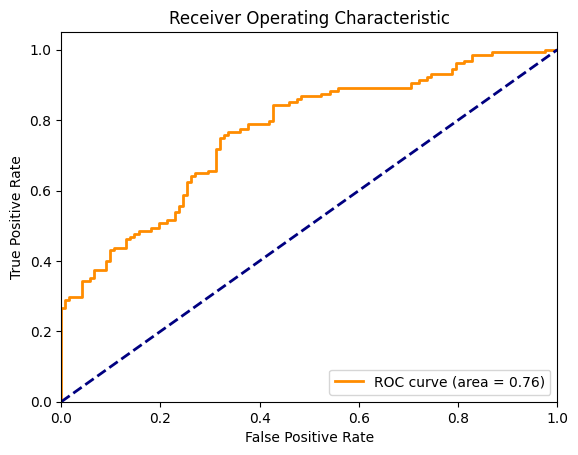

In [35]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [37]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       122
           1       0.93      0.89      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [ ]:
probabilities_xgb  = model.predict_proba(X_test)[: , 1]